In [4]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
%matplotlib inline

iris = load_iris()

df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

df['flower'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


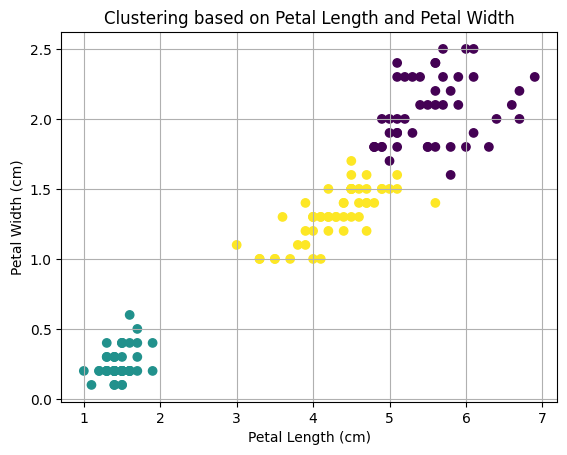

In [24]:

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)

df['flower'] = iris.target

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[['petal length (cm)', 'petal width (cm)']])

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Clustering based on Petal Length and Petal Width')
plt.grid(True)
plt.show()

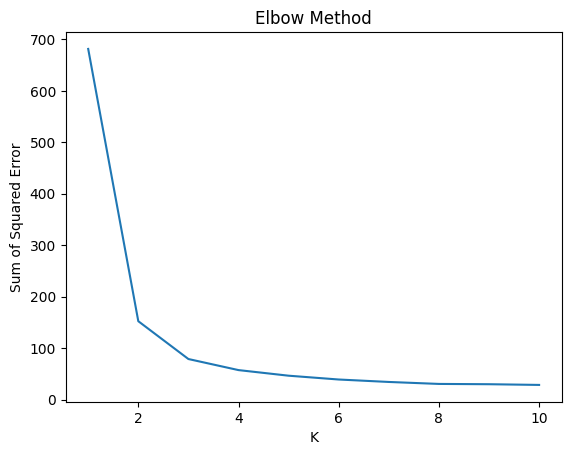

In [12]:
from sklearn.cluster import KMeans


X = df.drop('flower', axis=1)

sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')
plt.show()
